## Problem1 

注：把开学他给的文件包里的Utils.py 和这个notebook放到一个目录底下从而方便improt

In [73]:
import numpy as np
from Utils import timeout

目标分布 f(x) 是目标分布的概率密度函数（PDF, Probability Density Function），而问题中的F(x) 是一个累积分布函数（CDF, Cumulative Distribution Function）,因此需要F(x)对x求导得出f(x).

In [94]:
# Part 1
@timeout(seconds=10)
def problem1_inversion(n_samples=1):
# Distribution from part 1
# write the code in this function to produce samples from the distribution in the assignment
# Make sure you choose a good sampling distribution to avoid unnecessary rejections
# Return a numpy array of length n_samples
    """
    使用拒绝采样法从给定分布生成样本。
    """
    def target_pdf(x):
        """
        目标概率密度函数 p(x)。
        也可以用 lambda 表达式来写
        """
        return 2*x*np.exp(x*x)/(np.e-1)
        # 返回 p(x)  # 给定的概率密度函数

    def proposal_pdf(x):
        """
        提议分布 q(x)：均匀分布。
        我们通常在给定区间上使用均匀分布，
        或者选择某种 Beta 分布使得更容易被接受
        （实际上，我们选择具有厚尾的分布）
        """
        return 1  # 在 x 范围内的均匀分布

    # 拒绝采样的参数
    M = 2*np.e/(np.e-1)  # 缩放常数，基于最大比值 p(x) / q(x) 选择，M 越接近该比值，接受的概率越大
    samples = []
    count = 0  # 统计总迭代次数，用于效率检查

    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)  # 从均匀分布中采样
        u = np.random.uniform(0, M * proposal_pdf(x))  # 用于接受的均匀随机数

        if u <= target_pdf(x):  # 是否接受样本
            samples.append(x)
        count += 1

    return np.array(samples)

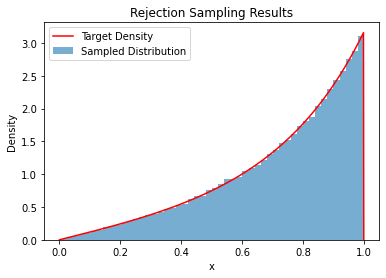

In [95]:
# Part 1-参考
import numpy as np
import matplotlib.pyplot as plt

# 定义目标分布的密度函数 f(x)
def target_density(x):
    if 0 < x < 1:
        return (2 * x * np.exp(x**2)) / (np.exp(1) - 1)
    return 0

# 定义辅助分布的密度函数 g(x) (均匀分布)
def proposal_density(x):
    return 1  # 均匀分布在 [0, 1] 的密度为 1

# 计算常数 c (f(x) 的最大值)
def compute_c():
    x_values = np.linspace(0, 1, 1000)
    f_values = [target_density(x) for x in x_values]
    return max(f_values)

# 拒绝采样算法
def rejection_sampling(num_samples):
    c = compute_c()  # 确定常数 c
    samples = []

    while len(samples) < num_samples:
        # 从均匀分布中生成候选样本,辅助分布的定义域必须完全覆盖目标分布的定义域
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)

        # 计算目标分布的密度值
        f_x = target_density(x)

        # 判断是否接受样本
        if u <= f_x / c:
            samples.append(x)

    return samples

# 生成样本
num_samples = 100000
samples = rejection_sampling(num_samples)

# 绘制生成的样本分布和目标分布
x = np.linspace(0, 1, 1000)
y = [target_density(xi) for xi in x]

plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Distribution')
plt.plot(x, y, label='Target Density', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling Results')
plt.show()


In [75]:
# Part 2
problem1_samples = problem1_inversion(n_samples=10000)

Theory for part 3:
$\mathbb{E}[g(x)]=\int_D sin(x)p(x)dx$, if $x \in D$ and x's probability density fuction is $p(x) $
So we use $\frac{1}{n}\sum_i sin(x_i)$ to estimate$\mathbb{E}[g(x)]$

In [76]:
# Part 3
problem1_integral = sum([np.sin(x) for x in problem1_samples])/len(problem1_samples)
print("problem1_integral:", problem1_integral)

problem1_integral: 0.6523983653933686


In [ ]:
# Part 3-参考
import numpy as np

# 定义 g(x) = sin(x)
def g(x):
    return np.sin(x)

# 从 problem1_samples 中近似计算积分
def monte_carlo_integration(samples):
    # 计算 g(x) 的值
    g_values = g(np.array(samples))
    
    # 求平均值，近似积分
    integral = np.mean(g_values)
    return integral

# 假设前面生成了 100000 个样本 problem1_samples
# 从均匀分布 [0, 1] 中生成一些样本作为测试（实际中应替换为你的采样结果）
problem1_samples =rejection_sampling(num_samples)

# 计算积分
problem1_integral = monte_carlo_integration(problem1_samples)
print("近似积分值为:", problem1_integral)


In [78]:
# Part 4
import numpy as np
import math

# 假设我们已经有 n 个样本的 Y 值
n = 10000  # 样本数量
Y_mean = problem1_integral

# Y 的范围 [a, b], 即 E(sin(X))的取值范围
a = 0  # 最小值发生在 X = 0
b = np.sin(1)  # 最大值发生在 X = 1

# Hoeffding's inequality 参数
delta = 0.05  # 1 - 置信水平
epsilon = math.sqrt(((b - a)**2 * math.log(2 / delta)) / (2 * n))

# 计算置信区间
problem1_interval = (Y_mean - epsilon, Y_mean + epsilon)

print(f"95% confidence interval for E[Y]: {problem1_interval}")

epsilon: 0.01142803019919356
95% confidence interval for E[Y]: (0.640970335194175, 0.6638263955925622)


Computed c: 55.971202630989595
Iterations: 1000, Samples: 20
Iterations: 2000, Samples: 38
Iterations: 3000, Samples: 53
Iterations: 4000, Samples: 70
Iterations: 5000, Samples: 89
Iterations: 6000, Samples: 103
Iterations: 7000, Samples: 121
Iterations: 8000, Samples: 143
Iterations: 9000, Samples: 156
Iterations: 10000, Samples: 171
Iterations: 11000, Samples: 182
Iterations: 12000, Samples: 193
Iterations: 13000, Samples: 207
Iterations: 14000, Samples: 227
Iterations: 15000, Samples: 245
Iterations: 16000, Samples: 268
Iterations: 17000, Samples: 282
Iterations: 18000, Samples: 302
Iterations: 19000, Samples: 314
Iterations: 20000, Samples: 331
Iterations: 21000, Samples: 349
Iterations: 22000, Samples: 362
Iterations: 23000, Samples: 379
Iterations: 24000, Samples: 394
Iterations: 25000, Samples: 416
Iterations: 26000, Samples: 428
Iterations: 27000, Samples: 438
Iterations: 28000, Samples: 458
Iterations: 29000, Samples: 477
Iterations: 30000, Samples: 495
Iterations: 31000, Samp

Iterations: 294000, Samples: 5081
Iterations: 295000, Samples: 5108
Iterations: 296000, Samples: 5129
Iterations: 297000, Samples: 5150
Iterations: 298000, Samples: 5163
Iterations: 299000, Samples: 5178
Iterations: 300000, Samples: 5198
Iterations: 301000, Samples: 5220
Iterations: 302000, Samples: 5236
Iterations: 303000, Samples: 5253
Iterations: 304000, Samples: 5274
Iterations: 305000, Samples: 5295
Iterations: 306000, Samples: 5315
Iterations: 307000, Samples: 5323
Iterations: 308000, Samples: 5339
Iterations: 309000, Samples: 5365
Iterations: 310000, Samples: 5382
Iterations: 311000, Samples: 5397
Iterations: 312000, Samples: 5419
Iterations: 313000, Samples: 5438
Iterations: 314000, Samples: 5455
Iterations: 315000, Samples: 5469
Iterations: 316000, Samples: 5484
Iterations: 317000, Samples: 5501
Iterations: 318000, Samples: 5520
Iterations: 319000, Samples: 5535
Iterations: 320000, Samples: 5546
Iterations: 321000, Samples: 5566
Iterations: 322000, Samples: 5577
Iterations: 32

Iterations: 535000, Samples: 9370
Iterations: 536000, Samples: 9391
Iterations: 537000, Samples: 9411
Iterations: 538000, Samples: 9423
Iterations: 539000, Samples: 9447
Iterations: 540000, Samples: 9458
Iterations: 541000, Samples: 9470
Iterations: 542000, Samples: 9487
Iterations: 543000, Samples: 9500
Iterations: 544000, Samples: 9514
Iterations: 545000, Samples: 9537
Iterations: 546000, Samples: 9557
Iterations: 547000, Samples: 9577
Iterations: 548000, Samples: 9594
Iterations: 549000, Samples: 9610
Iterations: 550000, Samples: 9632
Iterations: 551000, Samples: 9647
Iterations: 552000, Samples: 9661
Iterations: 553000, Samples: 9680
Iterations: 554000, Samples: 9702
Iterations: 555000, Samples: 9720
Iterations: 556000, Samples: 9741
Iterations: 557000, Samples: 9758
Iterations: 558000, Samples: 9772
Iterations: 559000, Samples: 9788
Iterations: 560000, Samples: 9800
Iterations: 561000, Samples: 9818
Iterations: 562000, Samples: 9838
Iterations: 563000, Samples: 9867
Iterations: 56

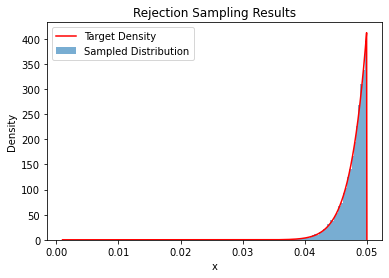

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标分布的概率密度函数 f(x)
def target_density(x):
    if 0 < x < 1/20:
        return 20 * np.exp(20 - 1/x) * (1 + 1/x)
    return 0

# 定义辅助分布的密度函数 g(x) (指数分布)
def proposal_density(x):
    return 20 * np.exp(-20 * x)  # 指数分布的密度函数

# 计算常数 c (f(x) 的最大值)
def compute_c():
    x_values = np.linspace(0.001, 1/20, 1000)  # 避免 x = 0
    f_values = [target_density(x) for x in x_values]
    g_values = [proposal_density(x) for x in x_values]
    c = max([f / g for f, g in zip(f_values, g_values)])
    print(f"Computed c: {c}")  # 添加调试信息
    return c

# 拒绝采样算法
# @timeout(seconds=2)
def rejection_sampling(num_samples):
    c = compute_c()  # 确定常数 c
    samples = []
    iterations = 0  # 添加计数器

    while len(samples) < num_samples:
        iterations += 1
        if iterations % 1000 == 0:
            print(f"Iterations: {iterations}, Samples: {len(samples)}")  # 添加调试信息

        # 从辅助分布（指数分布）生成候选样本
        x = np.random.exponential(1/20)
        if x > 1/20:
            continue  # 跳过超出范围的样本
        u = np.random.uniform(0, c * proposal_density(x))  # 从 [0, c * g(x)] 中生成随机值

        # 计算目标分布的密度值
        f_x = target_density(x)

        # 判断是否接受样本
        if u <= f_x:
            samples.append(x)

    return samples

# 生成样本
num_samples = 10000
samples = rejection_sampling(num_samples)

# 绘制生成的样本分布和目标分布
x = np.linspace(0.001, 1/20, 1000)
y = [target_density(xi) for xi in x]

plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Distribution')
plt.plot(x, y, label='Target Density', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling Results')
plt.show()

I choose a wrong distribution function and can not figure out a better one

In [28]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")
    
try:
    assert(isinstance(problem1_samples, np.ndarray))
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")
    
try:
    assert(isinstance(problem1_integral, float))
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

    
try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval,tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

    
try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Generated 10 samples with 331 total iterations.
Good, your problem1_inversion_2 returns a numpy array


## Problem 2

把数据放到合适地方再跑！！！！

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        
        logits = np.dot(X, coeffs[1:]) + coeffs[0]
        predictions = 1 / (1 + np.exp(-logits))  # 使用 sigmoid 函数得到概率
        # 计算负对数似然损失
        loss_value = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
        return loss_value

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration



df_spam = pd.read_csv("data/spam.csv",encoding='latin')
df_spam['label'] = df_spam['v1'].apply(lambda x: 1 if x == 'spam' else 0)
df_spam['free'] = df_spam['v2'].apply(lambda x: 1 if 'free' in x else 0)
df_spam['prize'] = df_spam['v2'].apply(lambda x: 1 if 'prize' in x else 0)
df_spam['win'] = df_spam['v2'].apply(lambda x: 1 if 'win' in x else 0)

problem3_X = df_spam.iloc[:, 6:9].to_numpy(dtype=np.int64)
problem3_Y = df_spam.iloc[:, 5].to_numpy(dtype=np.int64)

n_samples = problem3_X.shape[0]


# 随机打乱数据的索引
indices = np.random.permutation(n_samples)

# 计算划分点
train_end = int(0.4 * n_samples)  # 训练集的结束位置（40%）
calib_end = int(0.6 * n_samples)  # 校准集的结束位置（60%）

# 使用切片根据划分点提取数据
train_indices = indices[:train_end]
calib_indices = indices[train_end:calib_end]
test_indices = indices[calib_end:]

# 划分特征和标签
problem3_X_train = problem3_X[train_indices]
problem3_X_calib = problem3_X[calib_indices]
problem3_X_test = problem3_X[test_indices]

problem3_Y_train = problem3_Y[train_indices]
problem3_Y_calib = problem3_Y[calib_indices]
problem3_Y_test = problem3_Y[test_indices]

print(problem3_X_train.shape,problem3_X_calib.shape,problem3_X_test.shape,problem3_Y_train.shape,problem3_Y_calib.shape,problem3_Y_test.shape)

(2228, 3) (1115, 3) (2229, 3) (2228,) (1115,) (2229,)


In [53]:

problem3_ps = ProportionalSpam()
problem3_ps.fit(problem3_X_train, problem3_Y_train)


problem3_Y_pred = problem3_ps.predict(problem3_X_calib).reshape(-1, 1)
# 用决策树做校准模型
problem3_calibrator = DecisionTreeRegressor()
problem3_calibrator.fit(problem3_Y_pred, problem3_Y_calib)

DecisionTreeRegressor()

In [54]:
test_pred_raw = problem3_ps.predict(problem3_X_test).reshape(-1, 1)
problem3_final_predictions = problem3_calibrator.predict(test_pred_raw)
print("problem3_final_predictions:", problem3_final_predictions[0], problem3_final_predictions[1])

In [67]:
print("problem3_final_predictions:", problem3_final_predictions[0], problem3_final_predictions[1])

problem3_final_predictions: 0.11026615969581749 0.11026615969581749


In [70]:
def hoeffding_confidence_interval(value, n, confidence_level=0.99):
    """
    使用 Hoeffding 不等式计算置信区间。
    
    参数:
    - n: 样本数量。
    - confidence_level: 置信水平。

    返回:
    - (lower_bound, upper_bound): 置信区间。
    """
    delta = 1 - confidence_level  # 映射置信水平到 delta
    epsilon = np.sqrt(np.log(2 / delta) / (2 * n))  # Hoeffding 界限
    lower_bound = max(0, value - epsilon)  # 确保下界不小于 0
    upper_bound = min(1, value + epsilon)  # 确保上界不大于 1
    return lower_bound, upper_bound

In [72]:
# Part 4
# In order to compute this loss we first need to convert the predicted probabilities to a decision
# 1) 先将概率转换成二元决策（阈值 0.5）
predicted_labels = (problem3_final_predictions >= 0.5).astype(int)
# 2) 计算 0-1 损失 (即分类错误的比例)
problem2_01_loss = np.mean(predicted_labels != problem3_Y_test)

# Recall the interval is given as a tuple (a,b) or a list [a,b]
problem2_interval = hoeffding_confidence_interval(problem2_01_loss, 2229, confidence_level=0.99)
print(f"精确率的 99% 置信区间: {problem2_interval}")

精确率的 99% 置信区间: (0.09024502771332787, 0.15919418269492694)


In [55]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was correct for a test point


## Problem 3

Suppose A for state 0, B for state 1, C for state 2, D for state 3 \
state numbers are also matched with index number

In [99]:
import numpy as np
import networkx as nx
from functools import reduce
from math import gcd
from scipy.linalg import eig

In [100]:
#PART 1转移矩阵
P_A = np.array([[0.8, 0.2, 0.0,0.0],
              [0.6, 0.2, 0.2,0.0],
              [0.0, 0.4, 0.0,0.6],
              [0.0, 0.0, 0.8,0.2]])

P_B = np.array([[0.0, 0.2, 0.0,0.8],
              [0.0, 0.0, 1.0,0.0],
              [0.0, 1.0, 0.0,0.0],
              [0.5, 0.0, 0.5,0.0]])

P_C = np.array([[0.2, 0.3, 0.0,0.0,0.5],
               [0.2, 0.2, 0.6,0.0,0.0],
              [0.0, 0.4, 0.0,0.6,0.0],
              [0.0, 0.0, 0.0,0.6,0.4],
               [0.0,0.0,0.0,0.4,0.6]])

P_D = np.array([[0.8, 0.2, 0.0,0.0],
              [0.6, 0.2, 0.2,0.0],
              [0.0, 0.4, 0.0,0.6],
              [0.1, 0.0, 0.7,0.2]])

In [101]:
Ps=[P_A,P_B,P_C,P_D]
# 验证转移矩阵的合法性
def is_valid_transition_matrix(P):
    # 1. 检查是否为方阵
    if P.shape[0] != P.shape[1]:
        return False, "The matrix is not square."

    # 2. 检查是否所有元素为非负数
    if not np.all(P >= 0):
        return False, "The matrix contains negative elements."

    # 3. 检查每行是否归一化为 1
    if not np.allclose(np.sum(P, axis=1), 1):
        return False, "The rows do not sum to 1."

    return True, "The matrix is a valid transition matrix."

# 验证转移矩阵
is_vlid_list=[]
for i, p in enumerate(Ps):  # 使用 enumerate 获取索引 i 和矩阵 p
    is_valid, message = is_valid_transition_matrix(p)
    is_vlid_list.append(is_valid)
    
    # 输出验证结果
    print(f"Markov chain and Digraph have been successfully constructed.")
    print(f"The size of transition matrix P_{i} is: {p.shape}")
    print(f"Whether it is a qualified transition matrix: {message}")


# 如果转移矩阵有效，构建有向图
G_list=[]
for i, p in enumerate(Ps):
    if is_vlid_list[i]:
        # 1. 构建有向图
        G = nx.DiGraph()
        
        # 添加边和权重
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if p[i, j] > 0:  # 仅添加非零权重的边
                    G.add_edge(i, j, weight=p[i, j])
        
        # 打印构建结果
        print("The directed graph (Digraph) has been successfully constructed.")
        print("Number of nodes:", G.number_of_nodes())
        print("Number of edges:", G.number_of_edges())
    
        # 可视化或分析
        print("Graph edges with weights:")
        for u, v, data in G.edges(data=True):
            print(f"Edge from {u} to {v}, weight = {data['weight']}")
        G_list.append(G)
    else:
        print("The transition matrix is not valid. Please check your input.")
        G_list.append(None)


Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_0 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_1 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_2 is: (5, 5)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_3 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 4
Number of edges: 9
Graph edges with weights:
Edge from 0 to 0, weight = 0.8
Edge from 0 to 1, weight = 0.2
Edge from 1 to 0, weight = 0.6
Edge from 1

In [102]:
#irreducible
for G in G_list:
    is_irreducible = nx.is_strongly_connected(G)
    print("Is the Markov chain irreducible?", is_irreducible)


Is the Markov chain irreducible? True
Is the Markov chain irreducible? False
Is the Markov chain irreducible? False
Is the Markov chain irreducible? True


In [103]:
# 3. 计算状态的周期
# 计算状态 x 的返回时间集 T(x)
def get_return_times(P, x):
    n = len(P)
    times = []
    for t in range(1, n+1):
        if np.linalg.matrix_power(P, t)[x, x] > 0:
            times.append(t)
    return times

for P in Ps:
    # 计算状态的周期
    periods = {}
    for x in range(len(P)):
        T_x = get_return_times(P, x)
        period = reduce(gcd, T_x)
        periods[x] = period

    # 输出结果
    for state, period in periods.items():
        print(f"State {state} has period: {period}")
        if period == 1:
            print(f"State {state} is aperiodic")
        else:
            print(f"State {state} is not aperiodic")
    print('\n')

State 0 has period: 1
State 0 is aperiodic
State 1 has period: 1
State 1 is aperiodic
State 2 has period: 1
State 2 is aperiodic
State 3 has period: 1
State 3 is aperiodic


State 0 has period: 2
State 0 is not aperiodic
State 1 has period: 2
State 1 is not aperiodic
State 2 has period: 2
State 2 is not aperiodic
State 3 has period: 2
State 3 is not aperiodic


State 0 has period: 1
State 0 is aperiodic
State 1 has period: 1
State 1 is aperiodic
State 2 has period: 1
State 2 is aperiodic
State 3 has period: 1
State 3 is aperiodic
State 4 has period: 1
State 4 is aperiodic


State 0 has period: 1
State 0 is aperiodic
State 1 has period: 1
State 1 is aperiodic
State 2 has period: 1
State 2 is aperiodic
State 3 has period: 1
State 3 is aperiodic




In [104]:
#stationary distribution
# 4. 平稳分布 (stationary distribution)
stt_st=[]
for P in Ps:
    w, v = eig(P.T, left=True, right=False)
    stationary = np.real(v[:, np.isclose(w, 1)])
    stationary = stationary / stationary.sum()
    stt_st.append(stationary)
    print("Stationary distribution:", stationary.ravel())
    print('\n')

Stationary distribution: [0.25 0.25 0.25 0.25]


Stationary distribution: [0.25 0.25 0.25 0.25]


Stationary distribution: [0.2 0.2 0.2 0.2 0.2]


Stationary distribution: [0.25 0.25 0.25 0.25]




In [105]:
#reversible
for stationary in stt_st:
    # 计算平稳分布 π
    stationary = stationary.ravel()  # 将平稳分布从二维转换为一维
    is_reversible = True  # 初始假设是可逆的
    
    # 遍历所有状态对 (i, j)
    for i in range(len(P)):
        for j in range(len(P)):
            if not np.isclose(stationary[i] * P[i, j], stationary[j] * P[j, i]):
                is_reversible = False
                break
        if not is_reversible:
            break
    
    print("Is the Markov chain reversible?", is_reversible)

Is the Markov chain reversible? False
Is the Markov chain reversible? False
Is the Markov chain reversible? False
Is the Markov chain reversible? False
